In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [2]:
df =pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print("Number of Zeros in Glucose : ")
print(df[df["Glucose"] == 0].count())
print("-------------------------------")
print("Number of Zeros in BloodPressure : ")
print(df[df["BloodPressure"] == 0].count())
print("-------------------------------")
print("Number of Zeros in SkinThickness : ")
print(df[df["SkinThickness"] == 0].count())
print("-------------------------------")
print("Number of Zeros in Insulin : ")
print(df[df["Insulin"] == 0].count())
print("-------------------------------")
print("Number of Zeros in BMI : ")
print(df[df["BMI"] == 0].count())

Number of Zeros in Glucose : 
Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64
-------------------------------
Number of Zeros in BloodPressure : 
Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64
-------------------------------
Number of Zeros in SkinThickness : 
Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Out

In [6]:
df["Glucose"].replace({0:df["Glucose"].mean()},inplace = True)
df["BloodPressure"].replace({0:df["BloodPressure"].mean()},inplace = True)
df["SkinThickness"].replace({0:df["SkinThickness"].mean()},inplace = True)
df["Insulin"].replace({0:df["Insulin"].mean()},inplace = True)
df["BMI"].replace({0:df["BMI"].mean()},inplace = True)

In [7]:
print("Number of Zeros in Glucose : ")
print(df[df["Glucose"] == 0].count())
print("-------------------------------")
print("Number of Zeros in BloodPressure : ")
print(df[df["BloodPressure"] == 0].count())
print("-------------------------------")
print("Number of Zeros in SkinThickness : ")
print(df[df["SkinThickness"] == 0].count())
print("-------------------------------")
print("Number of Zeros in Insulin : ")
print(df[df["Insulin"] == 0].count())
print("-------------------------------")
print("Number of Zeros in BMI : ")
print(df[df["BMI"] == 0].count())

Number of Zeros in Glucose : 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
-------------------------------
Number of Zeros in BloodPressure : 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
-------------------------------
Number of Zeros in SkinThickness : 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     

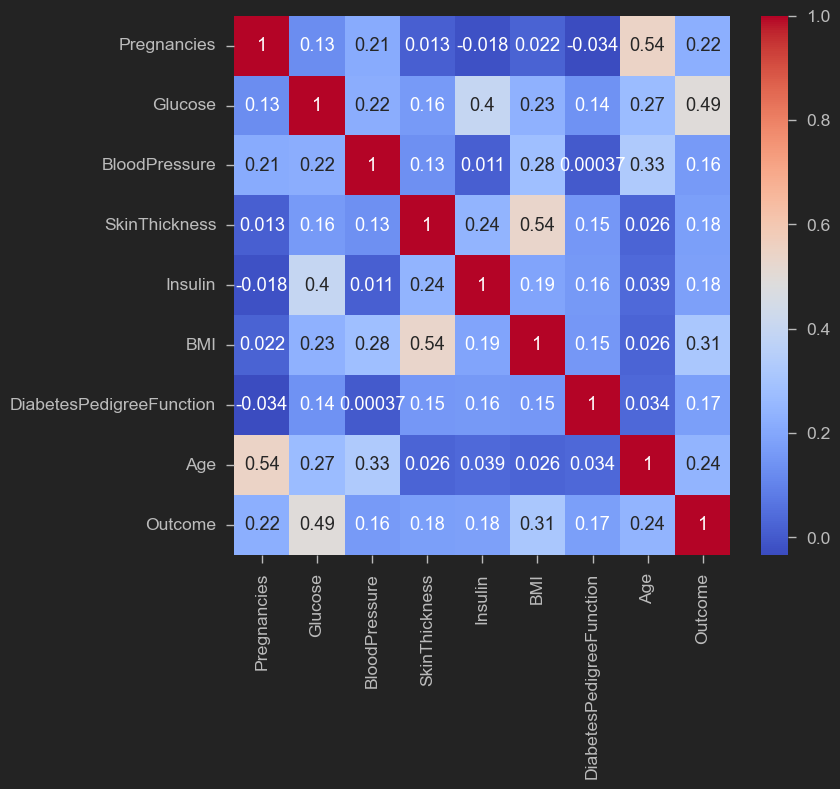

In [8]:
sns.heatmap(df.corr(),annot = True , cmap="coolwarm")
plt.show()

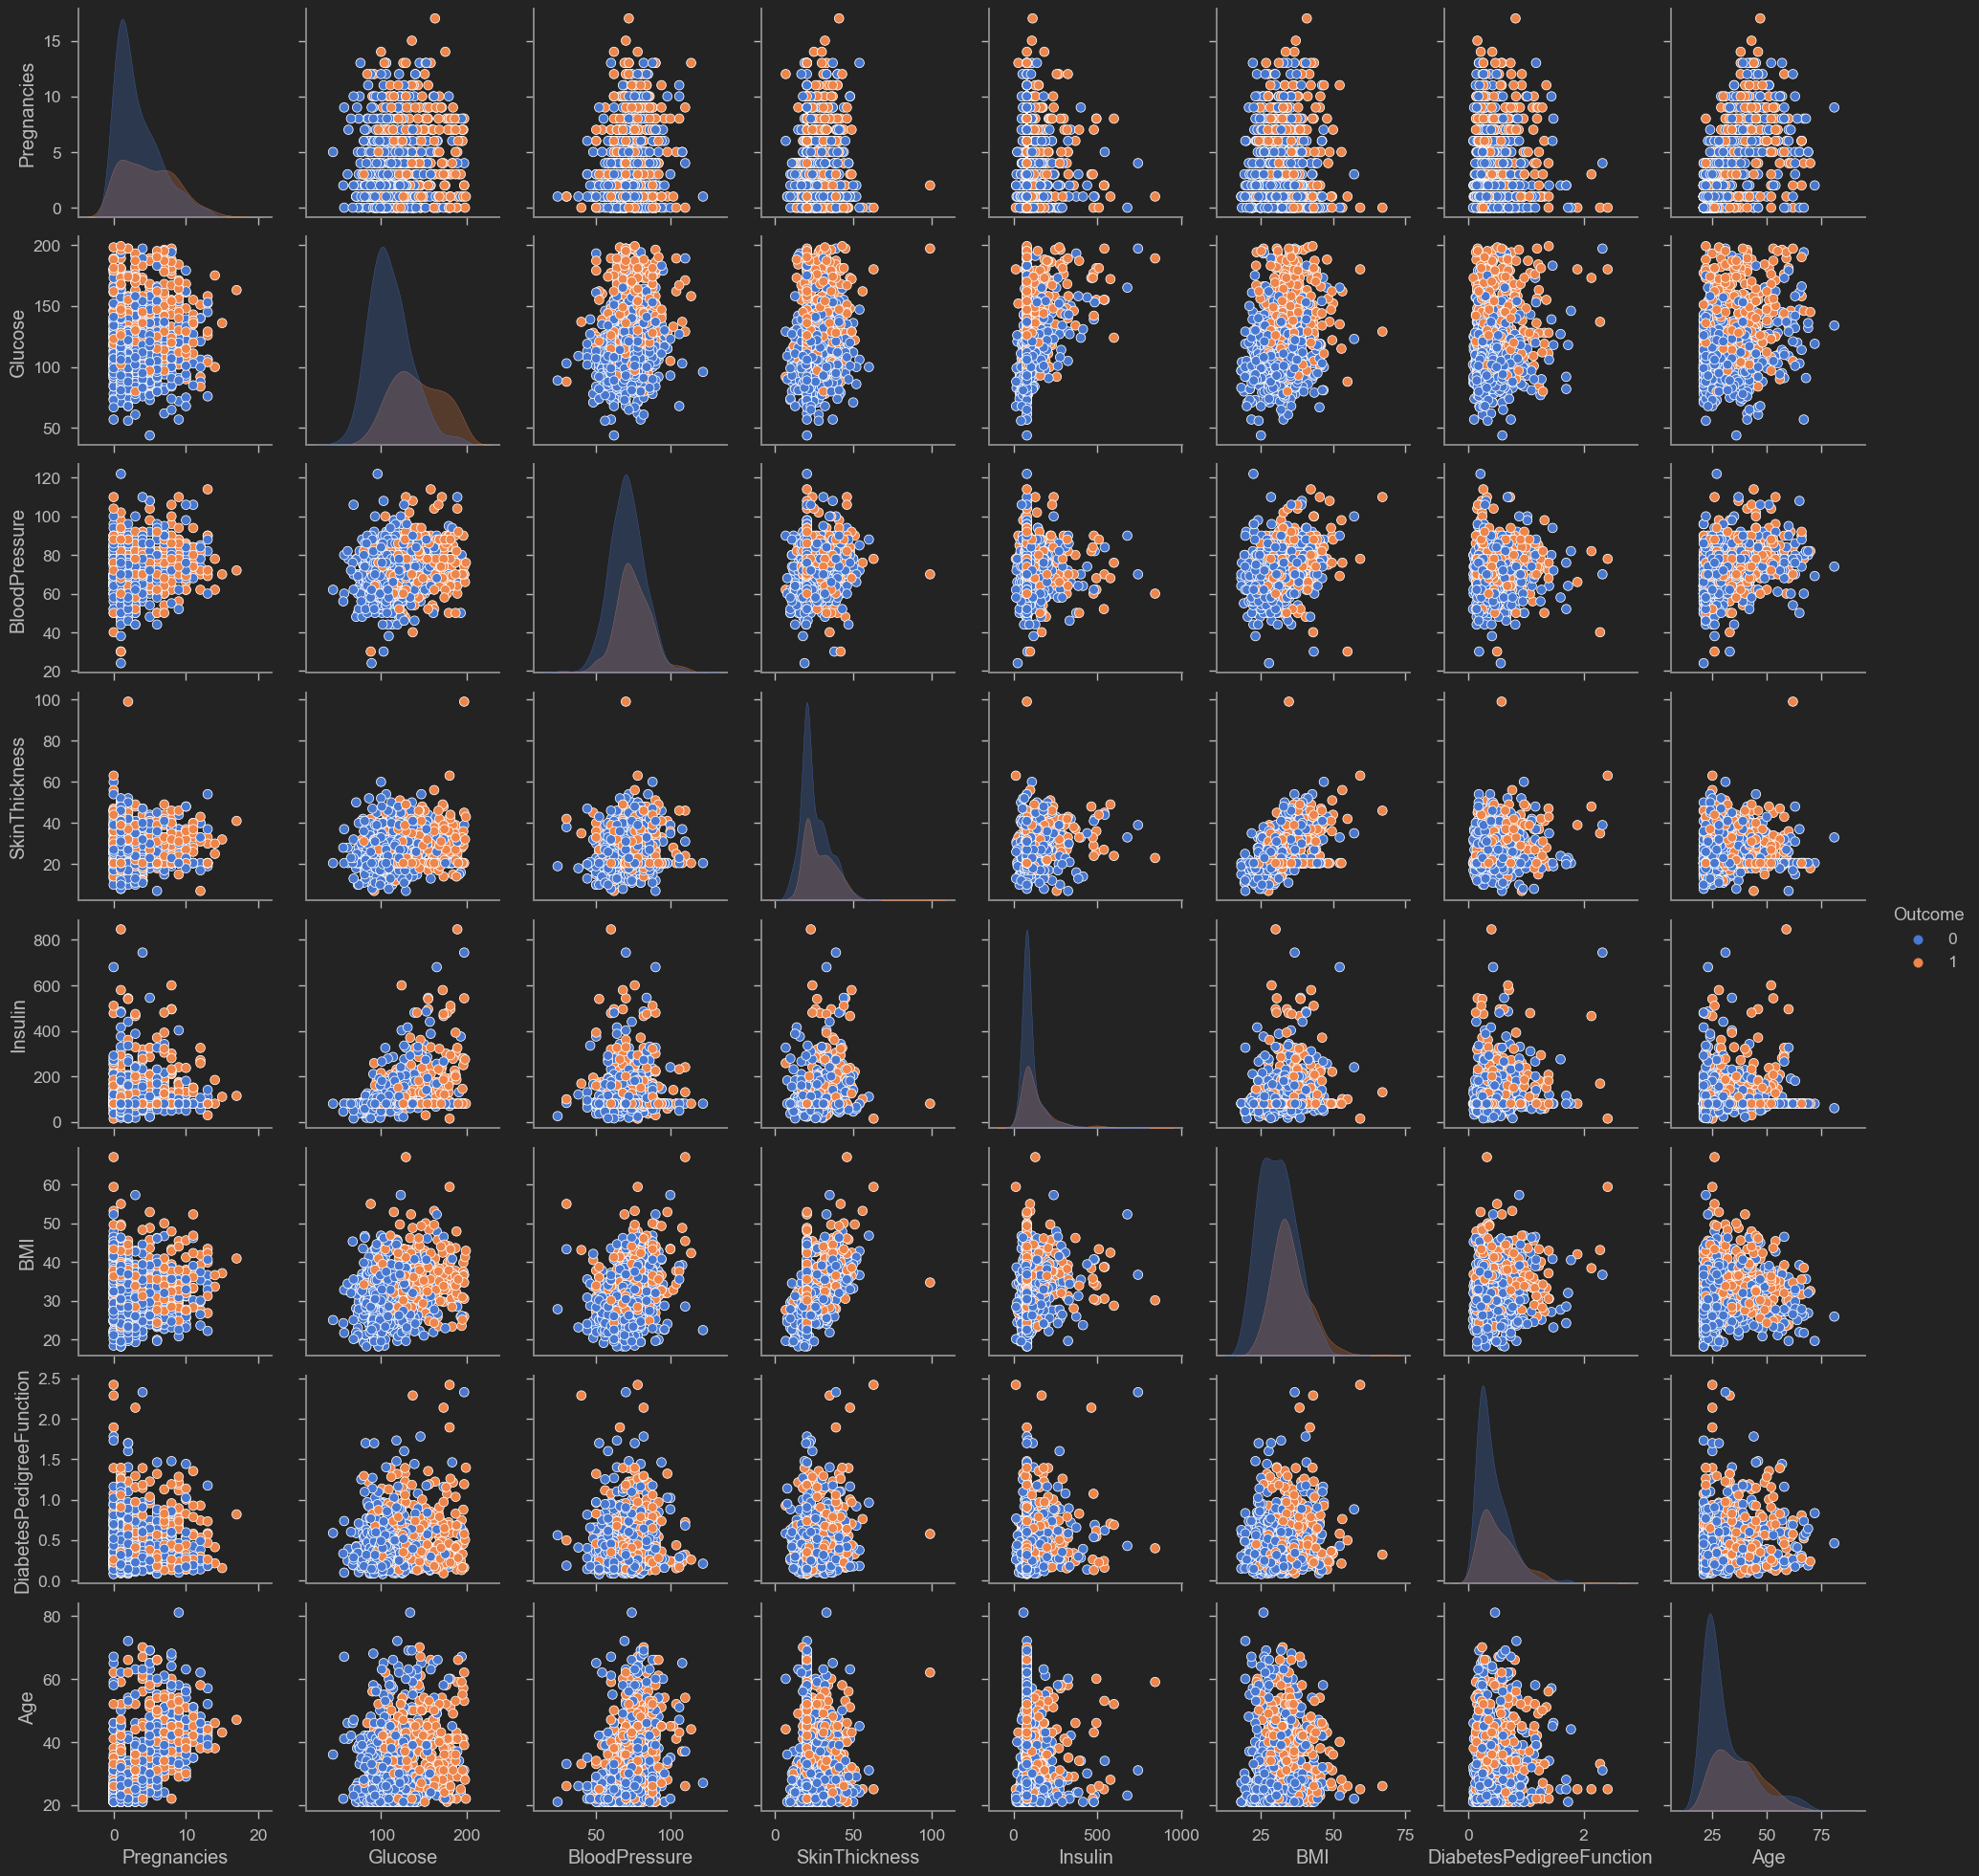

In [9]:
sns.pairplot(df , hue = "Outcome" , palette ="muted")
plt.show()

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [11]:
X = df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
Y = df["Outcome"]

# SikitLearn

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2 ,random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
logestic = LogisticRegression()
logestic.fit(X_train,y_train)
predicted = logestic.predict(X_test)
score = logestic.score(X_test,y_test)
print("The predicted Values is : ",predicted," \nThe Final Score is : " , score)

The predicted Values is :  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]  
The Final Score is :  0.8116883116883117


In [14]:
new_X = scaler.fit_transform(X)

# My Logestic Regression

In [15]:
def Log_Reg(X,Y,learn_rate,alpha,max_iter) :
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2 ,random_state=0)
    counter = 0
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_0 = np.ones(X_train.shape[0])
    X_train = np.insert(X_train , 0 , X_0 , axis = 1)
    X_1 = np.ones(X_test.shape[0])
    X_test = np.insert(X_test , 0 , X_1 , axis = 1)
    y_train = np.array(y_train.values)
    y_test = np.array(y_test.values)
    thetas = np.zeros(X_train.shape[1])
    length = len(Y)
    def segmoid(z) :
        f1 = np.exp(-z)
        return 1 / (1 + f1)
    def cost_function(predicted_y ,thetas,X,Y):
        X = np.matrix(X)
        Y = np.matrix(Y)
        thetas = np.matrix(thetas)
        term_1 = np.dot(-Y , np.log(predicted_y))
        term_2 = np.dot((1 - Y) , np.log(1 - predicted_y))
        final_term = np.sum(term_1 - term_2) / length
        return final_term
    def predict(predictions) :
        result = [1 if x >= 0.5 else 0 for x in predictions]
        return result
    for i in range(max_iter) :
        predicted_y = segmoid(X_train @ thetas.T)
        cost_fun = cost_function(predicted_y , thetas , X_train , y_train) 
        error = predicted_y - y_train
        gradient = error @ X_train
        thetas = thetas - (alpha / learn_rate) * gradient
        counter += 1
    print("For the Number of Iterations equal : " , counter)
    predictions = X_test @ thetas
    results = predict(predictions)
    print("The predicted Accuract is : " , accuracy_score(y_test , results))
    return thetas , results

In [16]:
l , m = Log_Reg(new_X,Y,0.9,0.008,153)

For the Number of Iterations equal :  153
The predicted Accuract is :  0.8051948051948052
